### Importing libraries and reading data

In [23]:
import os

# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# preprocess
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict

# machine learning models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline


# hyperopt - used for Bayesian hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial

# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, log_loss
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, average_precision_score, roc_auc_score, fbeta_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, roc_curve, plot_roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# for timing
from time import time
from tqdm import tqdm

import warnings

np.random.seed(1)

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9,8)


In [25]:
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_excel('C:/Y4S1/BT4016/Assignment/train.xlsx')

In [27]:
df_train = df.copy()
df_train

,gvkey,datadate,conm,at,cogs,csho,dvp,ebit,gp,ib,...,xido,xopr,mkvalt,sic,bankrupt,Altman_X1,Altman_X2,Altman_X3,Altman_X4,Altman_X5
0,1240,2002-01-31,ALBERTSON'S INC,15967.000,26094.000,407.000,0.0,1787.000,11837.000,501.000,...,0.000,35118.000,11701.2500,5411,0,0.064320,0.339074,0.111918,1.164072,2.375587
1,1655,2002-01-31,ANGELICA CORP,290.865,246.466,8.608,0.0,12.856,103.597,1.629,...,-24.338,326.107,101.5744,7200,0,0.161449,0.488845,0.044199,0.680060,1.203524
2,1864,2002-01-31,REX AMERICAN RESOURCES CORP,307.329,325.912,8.163,0.0,22.236,138.591,22.554,...,-0.245,438.069,240.4004,2860,0,0.300186,0.438319,0.072352,1.508575,1.511419
3,1878,2002-01-31,AUTODESK INC,902.444,124.903,55.644,0.0,131.804,822.588,90.313,...,0.000,768.484,2281.4040,7370,0,0.214106,0.079664,0.146052,6.114234,1.049917
4,2436,2002-01-31,CALERES INC,700.898,1044.110,17.484,0.0,54.842,711.738,0.949,...,-4.911,1674.299,278.6950,3140,0,0.321669,0.206953,0.078245,0.627350,2.505141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26814,287462,2011-12-31,FUTUREFUEL CORP,385.244,239.011,41.308,0.0,51.615,70.874,34.509,...,0.000,249.151,513.0454,2860,0,0.536611,0.090148,0.133980,5.288801,0.804386
26815,293884,2011-12-31,INTERXION HOLDING NV,965.556,132.021,66.129,0.0,76.970,184.922,33.175,...,0.000,192.824,889.4351,7370,0,0.103112,-0.191081,0.079716,1.657171,0.328249
26816,294524,2011-12-31,LYONDELLBASELL INDUSTRIES NV,22839.000,44889.000,569.340,0.0,4212.000,6146.000,2147.000,...,0.000,45892.000,18497.8566,2820,0,0.280967,0.018127,0.184421,1.517213,2.234555
26817,296318,2011-12-31,OCEAN RIG UDW INC,6015.355,284.000,131.697,0.0,217.645,415.649,95.298,...,0.000,321.639,1606.7034,1381,0,0.013940,-0.078596,0.036182,0.532568,0.116311


In [28]:
# Preparing other data

labels = df_train['bankrupt']
train_df = df_train.copy()

train_df_industry = df_train.copy()
train_df_industry['industry'] = train_df_industry['sic'].astype(str).str[:-1]
industry_dummy = pd.get_dummies(train_df_industry['industry'], prefix='industry')
train_df_industry = train_df_industry.join([industry_dummy])


train_df_division = df_train.copy()
train_df_division['division'] = train_df_division['sic'].astype(str).str[:-2]
division_dummy = pd.get_dummies(train_df_division['division'], prefix='division')
train_df_division = train_df_division.join([division_dummy])

train_df = train_df.drop(columns= ['gvkey', 'datadate', 'conm', 'bankrupt','sic'])
train_df_industry = train_df_industry.drop(columns= ['gvkey', 'datadate', 'conm', 'bankrupt','sic', 'industry'])
train_df_division = train_df_division.drop(columns= ['gvkey', 'datadate', 'conm', 'bankrupt','sic', 'division'])

In [29]:
df_test = pd.read_csv('C:/Y4S1/BT4016/Assignment/test.csv')

In [30]:
df_test

,id,at,cogs,csho,dvp,ebit,gp,ib,lct,lt,...,xido,xopr,mkvalt,sic,Altman_X1,Altman_X2,Altman_X3,Altman_X4,Altman_X5,bankrupt
0,0,438.049,364.536,8.330,0.0,23.460,45.416,26.495,37.241,156.206,...,1.775,374.912,214.0810,2860,0.204995,0.740381,0.053556,1.370504,0.935859,NaN
1,1,3227.800,113.600,225.900,0.0,354.300,2102.000,285.300,954.100,1344.900,...,0.000,1745.800,8132.4000,7370,0.291778,0.160326,0.109765,6.046844,0.686412,NaN
2,2,1227.476,1520.884,41.971,0.0,65.410,1061.940,8.923,524.580,813.760,...,14.998,2458.303,396.6260,3140,0.236712,0.241455,0.053288,0.487399,2.104175,NaN
3,3,394.559,358.532,11.088,0.0,82.269,177.235,63.046,56.518,83.832,...,0.000,443.516,630.0202,3537,0.394286,0.739892,0.208509,7.515271,1.357888,NaN
4,4,551.089,574.176,29.163,0.0,96.475,357.282,64.834,156.993,184.410,...,0.000,813.158,781.8600,5621,0.493820,0.532903,0.175062,4.239792,1.690213,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7706,7706,6077.301,459.617,215.784,0.0,370.978,626.177,188.257,572.826,3498.429,...,0.000,515.479,1001.2378,1381,-0.003525,0.035461,0.061043,0.286196,0.178664,NaN
7707,7707,4557.600,324.400,182.067,232.7,124.900,518.800,-29.900,242.600,2005.000,...,0.000,631.600,4227.5957,2890,0.293093,-0.077826,0.027405,2.108527,0.185010,NaN
7708,7708,1324.205,78.393,180.300,0.0,-62.001,-29.406,-116.565,20.342,124.217,...,0.000,110.302,355.1910,4412,0.258538,-0.092789,-0.046821,2.859440,0.036994,NaN
7709,7709,2015.900,1185.500,95.831,0.0,395.300,932.800,186.300,531.300,1997.400,...,-11.100,1679.000,5314.7873,3420,0.219505,-0.002877,0.196091,2.660853,1.050796,NaN


In [31]:
# test data for later

test_df_division = df_test.copy()
test_df_division['division'] = test_df_division['sic'].astype(str).str[:-2]
division_dummy = pd.get_dummies(test_df_division['division'], prefix='division')
test_df_division = test_df_division.join([division_dummy])
test_df_division['division_8'] = 0
test_df_division['division_9'] = 0

test_df_division = test_df_division.drop(columns = ['id', 'sic','division', 'bankrupt'])

### Q1 
Altman Z-Score = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E

Where:
- A = working capital / total assets
- B = retained earnings / total assets
- C = earnings before interest and tax / total assets
- D = market value of equity / total liabilities
- E = sales / total assets

The lower the Z-score, the higher the odds that a company is heading for bankruptcy

#### Calculation of Altman Z_Score

In [32]:
def calulate_zscore(row):
    value = 1.2*row.loc['Altman_X1'] + 1.4*row.loc['Altman_X2'] + 3.3*row.loc['Altman_X3'] + 0.6*row.loc['Altman_X4'] + 1*row.loc['Altman_X5']
    return value

In [33]:
def calulate_altman(row):
    value = row.loc['Z_score']
    if value<2.675:
        return 1
    else:
        return 0

In [34]:
df_train['Z_score'] = df_train.apply(lambda x: calulate_zscore(x), axis =1)
df_train['Altman_classification'] = df_train.apply(lambda x: calulate_altman(x), axis =1)

#### Evaluation of Altman Classification

In [35]:
def evaluate_performance(y_true, y_pred, name_of_model):
    no_danger, possible_bankruptcy = Counter(y_pred)[0], Counter(y_pred)[1]
    print(f'As per {name_of_model}, there are {no_danger} companies with no risk and {possible_bankruptcy} companies at risk of bankruptcy\n\n')
    
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    f = sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
    print('Confusion Matrix\n')
    print(cm)
    print("\n")
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")
    plt.show()
    
    f_score = f1_score(y_true, y_pred)
    print(f'F1 Score: {f_score}')
    
    return cm, f_score

As per Altman Classification with Z_score, there are 15450 companies with no risk and 11369 companies at risk of bankruptcy


Confusion Matrix

[[15433 11205]
 [   17   164]]


TN: 15433, FP: 11205, FN: 17, TP: 164




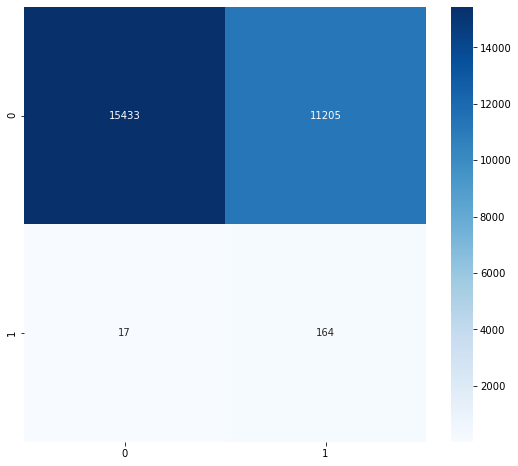

F1 Score: 0.028398268398268398


In [36]:
altman_cm, altman_f1 = evaluate_performance(df_train['bankrupt'], df_train['Altman_classification'], 'Altman Classification with Z_score')

### Q2
- Prediction model: Logistic regression and CART decision tree with default parameters
- Input features: the 5 financial ratios in Q1. 
- 5-fold stratified cross validation performance of training data with shuffle=False 

In [37]:
altman_columnns = [col for col in df_train.columns if 'Altman' in col][:-1]
df_train_altman = df_train[altman_columnns]

In [38]:
def build_model(features, label, model, smote=None):
    all_y_true = [] 
    all_y_preds = [] 
    
    kf = StratifiedKFold(n_splits=5, shuffle=False)
    kf.get_n_splits(features, label)
    

    for train_index, test_index in kf.split(features, label):
        
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = label.iloc[train_index], label.iloc[test_index]
        
        if smote=='Smote':
            smote_only = SMOTE(random_state=1, sampling_strategy=0.1)
            X_train, y_train = smote_only.fit_resample(X_train, y_train)
        
        if smote=='SmoteENN':
            smote_only = SMOTE(random_state=1, sampling_strategy=0.1)
            ennObj = EditedNearestNeighbours(n_neighbors=5)
            smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
            X_train, y_train = smote_enn.fit_resample(X_train, y_train)



        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        all_y_true.extend(y_test)
        all_y_preds.extend(y_preds)
    
    return all_y_true, all_y_preds

#### Logistic Regression

As per Logistic Regression, there are 26803 companies with no risk and 16 companies at risk of bankruptcy


Confusion Matrix

[[26630     8]
 [  173     8]]


TN: 26630, FP: 8, FN: 173, TP: 8




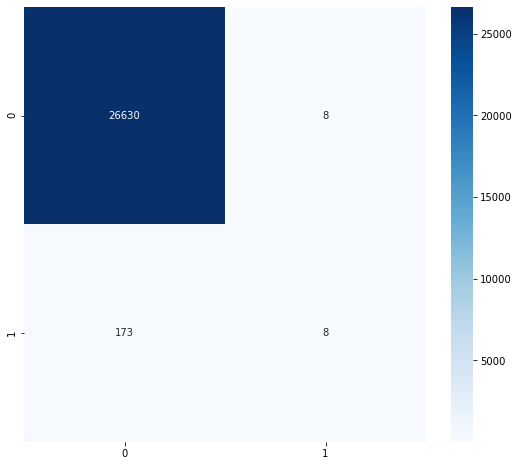

F1 Score: 0.08121827411167512


In [39]:
lr = LogisticRegression(random_state = 1)
lr_true, lr_pred = build_model(df_train_altman, df_train['bankrupt'], lr)
lr_cm,  lr_f1 = evaluate_performance(lr_true, lr_pred, 'Logistic Regression')

#### CART Decision Tree

As per Decision Tree Classifier, there are 26618 companies with no risk and 201 companies at risk of bankruptcy


Confusion Matrix

[[26462   176]
 [  156    25]]


TN: 26462, FP: 176, FN: 156, TP: 25




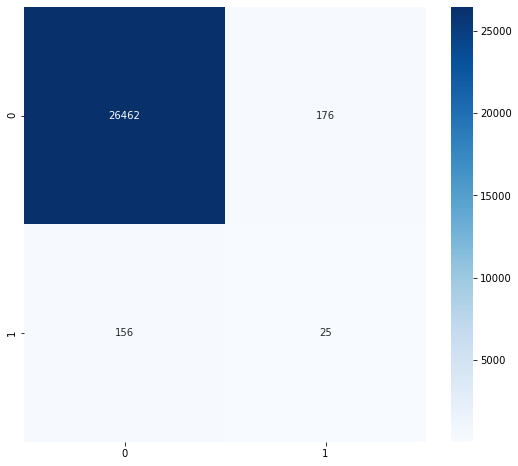

F1 Score: 0.13089005235602091


In [40]:
dt = DecisionTreeClassifier(random_state = 1)
dt_true, dt_pred = build_model(df_train_altman, df_train['bankrupt'], dt)
dt_cm,  dt_f1 = evaluate_performance(dt_true, dt_pred, 'Decision Tree Classifier')

### Q3
Dealing with unbalanced dataset using CART decision tree
- (1) SMOTE for oversampling to target a 1:10 minority: majority ratio by setting sampling_strategy = 0.1  
- (2) SMOTE (1:10 ratio) + Edited NN (5-NN method) 
- (3) Over-weighting rows with label=1 by 10 times (using class_weight variable in DecisionTreeClassifier) 

- 5-fold stratified cross validation confusion matrix and F1 score and shuffle=False

#### (1) SMOTE for oversampling to target a 1:10 minority: majority ratio

As per Decision Tree Classifier, there are 26161 companies with no risk and 658 companies at risk of bankruptcy


Confusion Matrix

[[26026   612]
 [  135    46]]


TN: 26026, FP: 612, FN: 135, TP: 46




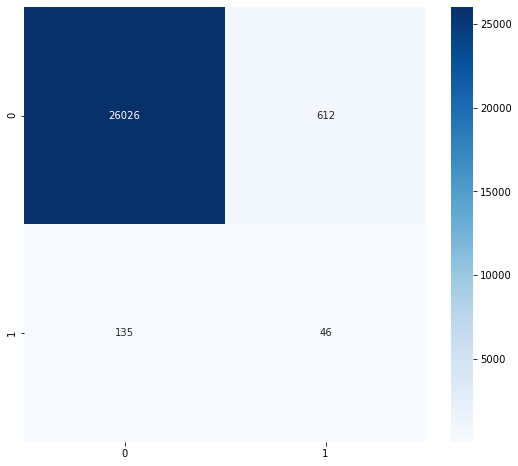

F1 Score: 0.1096543504171633


In [41]:
dt_smote = DecisionTreeClassifier(random_state = 1)
dt_true_smote, dt_pred_smote = build_model(df_train_altman, df_train['bankrupt'], dt_smote, 'Smote')
dt_cm_smote,  dt_f1_smote = evaluate_performance(dt_true_smote, dt_pred_smote, 'Decision Tree Classifier')

#### (2) SMOTE (1:10 ratio) + Edited NN (5-NN method) 

As per Decision Tree Classifier, there are 25804 companies with no risk and 1015 companies at risk of bankruptcy


Confusion Matrix

[[25697   941]
 [  107    74]]


TN: 25697, FP: 941, FN: 107, TP: 74




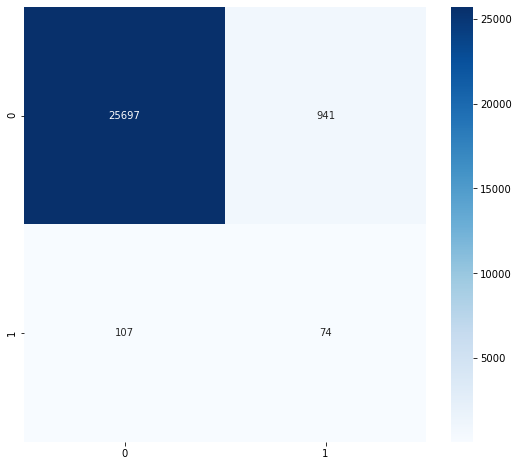

F1 Score: 0.1237458193979933


In [42]:
dt_smoteENN = DecisionTreeClassifier(random_state = 1)
dt_true_smoteENN, dt_pred_smoteENN = build_model(df_train_altman, df_train['bankrupt'], dt_smoteENN, 'SmoteENN')
dt_cm_smoteENN,  dt_f1_smoteENN = evaluate_performance(dt_true_smoteENN, dt_pred_smoteENN, 'Decision Tree Classifier')

#### (3) Over-weighting rows with label=1 by 10 times

As per Decision Tree Classifier, there are 26605 companies with no risk and 214 companies at risk of bankruptcy


Confusion Matrix

[[26443   195]
 [  162    19]]


TN: 26443, FP: 195, FN: 162, TP: 19




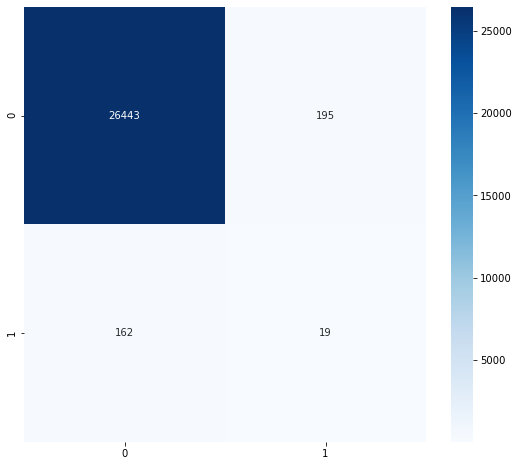

F1 Score: 0.09620253164556962


In [43]:
dt_weight = DecisionTreeClassifier(random_state = 1, class_weight={0: 1, 1: 10})
dt_true_weight, dt_pred_weight = build_model(df_train_altman, df_train['bankrupt'], dt_weight)
dt_cm_weight,  dt_f1_weight = evaluate_performance(dt_true_weight, dt_pred_weight, 'Decision Tree Classifier')

#### Evaluation of results for Q3
It is unfortunate that none of the sampling methods have helped to improve the performance from the original decision tree classifier. The original decision tree model has a f1 score of 0.13. The SMOTE model and the SMOTE + ENN model have f1 scores of 0.11 and 0.12. This shows that the model is better off without the help of resampling methods. Needless to say, the class weights paramater, with a f1 score of 0.096 performed the worst. All of these results implicitly depicts the fact that the models suffer from a serious case of imbalanced dataset issue which is why their f1 scores were barely 0.15. 


### Q4
XGBoost.
- Handling unbalanced classification: All three methods in Q3 have been tested and only the results of one of the three methods that gives you the best performance in 5-fold cross-validation on your training dataset has been reported. 
- Input features: I have used 5 financial ratios, all accounting variables of A2, and industry classification code and dropped the other columns. Initially I tried with the industry column obtained with the SIC code. Then I tried with the major division column, obtained from the SIC code. 
- Hyperparamter Tuning: I have used Bayesian Optimization and RandomisedSearchCV for tuning
Output: File with your predicted probability for the TA to evaluate your PR_AUC (not ROC_AUC)
- I have also added the seed and explained how I reached my final model

#### Required Helper Functions

In [44]:
# Set model
def instance_model(hyperparameters, eval_set):

    if pd.DataFrame(hyperparameters.keys())[0][0] == 'xgb':
        model = XGBClassifier(**hyperparameters['xgb'], 
                            n_jobs = -1,
                            random_state = 42,
                            early_stopping_rounds = 100,
                            verbose = 1
                             )  

        # SMOTE: Synthetic Minority Oversampling Technique
        if hyperparameters['xgb']['sample'] == 'smoteENN':
            smote_only = SMOTE(random_state=1, sampling_strategy=0.1)
            ennObj = EditedNearestNeighbours(n_neighbors=5)
            undersample = SMOTEENN(smote=smote_only , enn= ennObj)
                              
            if hyperparameters['xgb']['power'] == True:
                power = PowerTransformer(method='yeo-johnson', standardize=True)
                model = Pipeline([('sampling', undersample),
                                  ('power', power), ('xgb', model) ])
            else: 
                model = Pipeline([('sampling', undersample), ('xgb', model) ])
        
        if hyperparameters['xgb']['sample'] == 'smote':
            undersample = SMOTE(random_state=1, sampling_strategy=0.1)
            
            if hyperparameters['xgb']['power'] == True:
                power = PowerTransformer(method='yeo-johnson', standardize=True)
                model = Pipeline([('sampling', undersample),
                                  ('power', power), ('xgb', model) ])
            else: 
                model = Pipeline([('sampling', undersample), ('xgb', model) ])

                
        ## No resampling
        else:
            if hyperparameters['xgb']['power'] == True:
                power = PowerTransformer(method='yeo-johnson', standardize=True)
                model = Pipeline([('sampling', None), 
                                  ('power', power), ('xgb', model) ])
            else:
                model = Pipeline([('sampling', None), ('xgb', model) ])
    
    return model


In [45]:
# objective function
def to_minimize(hyperparameters, features, target):
    # create an instance of the model 
    model = instance_model(hyperparameters)
    
    # train with cross-validation
    resultado = cross_val_score(estimator = model, 
                                X = features, 
                                y = target, 
                                scoring = 'average_precision',
                                cv = cv,
                                n_jobs = -1,
                                error_score='raise')
    
    return -resultado.mean()

In [46]:
# function to get the optimization history

def extract_space_eval(hp_space, trial):
    
    ## get resultst
    desempacota_trial = space_eval(space = hp_space, 
                                   hp_assignment = {k: v[0] for (k, v) in trial['misc']['vals'].items() if len(v) > 0})
    
    return desempacota_trial

In [47]:
# function to unpack dictionary

def unpack_dictionary(dictionary):
    unpacked = {}
    for (key, value) in dictionary.items():
        if isinstance(value, dict):
            unpacked = {**unpacked, **unpack_dictionary(value)}
        else:
            unpacked[key] = value
            
    return unpacked



In [48]:
# Metrics to evaluate model
def evalue_model(model, y_test, X_test, model_name):
    # predict
    pred_prob = model.predict_proba(X_test)    
    # pr curve to best threshold
    precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:, 1])
    # calcule fscore
    fscore_f1  = (2*precision*recall)/(precision+recall) #f1
    threshold_f1  = thresholds[np.argmax(fscore_f1)]
    
    # prob true class
    pred_prob = [predicao[1] for predicao in pred_prob]
    pred_class = [instancia >= threshold_f1 for instancia in pred_prob]

    # metrics
    dictionary = {'F1': fscore_f1,
                  'recall': recall_score(y_true = y_test, y_pred = pred_class),
                  'precision': precision_score(y_true=y_test,y_pred=pred_class),
                  'logloss': log_loss(y_test, pred_prob),
                  'auc': roc_auc_score(y_true = y_test, y_score = pred_prob),
                  'aucpr': auc(recall, precision),
                  'model_name': model_name}
    
    return dictionary

In [49]:
# pr_auc plot
def plot_auc_pr(name, labels, predictions,n=0.5, **kwargs):
    p, r, _ = precision_recall_curve(labels, predictions)

    plt.plot(100*r, 100*p, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall [%]')
    plt.ylabel('Precision [%]')
    plt.xlim([-0.5,100])
    plt.title('Precision-Recall Curve')
    plt.ylim([20,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [50]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    X_train = pd.DataFrame(X_train.values, columns=X.columns)
    X_test  = pd.DataFrame(X_test.values, columns=X.columns)
    y_train = y_train.values
    y_test  = y_test.values

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
    eval_set = [(pd.DataFrame(X_val), pd.DataFrame(y_val))]

    print(f"Train: Bankruptcy = {sum(y_train)}, No Bankruptcy = {len(y_train) - sum(y_train)}")
    print(f"Val: Bankruptcy = {sum(y_val)}, No Bankruptcy = {len(y_val) - sum(y_val)}")
    print(f"Test: Bankruptcy = {sum(y_test)}, No Bankruptcy = {len(y_test) - sum(y_test)}")

    
    
    return X_train, X_test, y_train, y_test, eval_set

In [51]:
# to run the model

def run_xgb(X, y, XGB_param_hyperopt, iterations):
    X_train, X_test, y_train, y_test, eval_set = split_data(X, y)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)
    
    interactions_xgb = Trials()
    
    def to_minimize(hyperparameters, features, target):
        model = instance_model(hyperparameters, eval_set)

        # train with cross-validation
        resultado = cross_val_score(estimator = model, 
                                    X = features, 
                                    y = target, 
                                    scoring = 'average_precision',
                                    cv = cv,
                                    n_jobs = -1,
                                    error_score='raise')

        return -resultado.mean()
    
    optimization = fmin(fn = partial(to_minimize, features = X_train, target = y_train),
                  space = XGB_param_hyperopt, 
                  algo = tpe.suggest,
                  trials = interactions_xgb,
                  max_evals = iterations, 
                  rstate = np.random.RandomState(42))
    
    xgb_history = pd.DataFrame([unpack_dictionary(extract_space_eval(XGB_param_hyperopt, x)) for x in interactions_xgb.trials])    
    xgb_history['average precision'] = pd.DataFrame(interactions_xgb.results).loss * -1
    
    selected_hyperparameters = space_eval(space = XGB_param_hyperopt, hp_assignment = optimization)
    model_xgb_bayeshp = instance_model(selected_hyperparameters, eval_set)

    print("Historical max Average Precision:",f"{xgb_history['average precision'].max():.3f} STD:{xgb_history['average precision'].std():.2f}")

    
    return xgb_history, model_xgb_bayeshp

#### Trial 1 with HyperOpt

In [52]:
# choices source: https://github.com/microsoft/LightGBM/issues/695#issuecomment-315591634
XGB_param_hyperopt = {
    'xgb': {
        'booster': hp.choice('booster', ['dart','gbtree']), 
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
        'max_depth': ho_scope.int(hp.quniform('max_depth', 1, 20, 1)),
        'subsample': hp.uniform('subsample', 0.1, 0.5),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
        'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
        'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
        'gamma': hp.uniform('gamma', 1, 20),
        'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
        'reg_lambda': hp.uniform('reg_lambda', 1, 6),
        'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
        'sample':  hp.choice(label = 'sample', options = [None, 'smote', 'smoteENN']),
        'power': hp.choice(label = 'power', options = [False, True])
    }
}

In [55]:
xgb_history, xgb_initial_model = run_xgb(train_df_industry, labels, XGB_param_hyperopt, 45)

Train: Bankruptcy = 116, No Bankruptcy = 17048
Val: Bankruptcy = 29, No Bankruptcy = 4262
Test: Bankruptcy = 36, No Bankruptcy = 5328
100%|██████████████████████████████████████████████| 45/45 [33:28<00:00, 44.64s/trial, best loss: -0.33282821536746443]
Historical max Average Precision: 0.333 STD:0.05


#### Plotting results to understand the effect or each parameter

Text(0, 0.5, 'Average Precision')

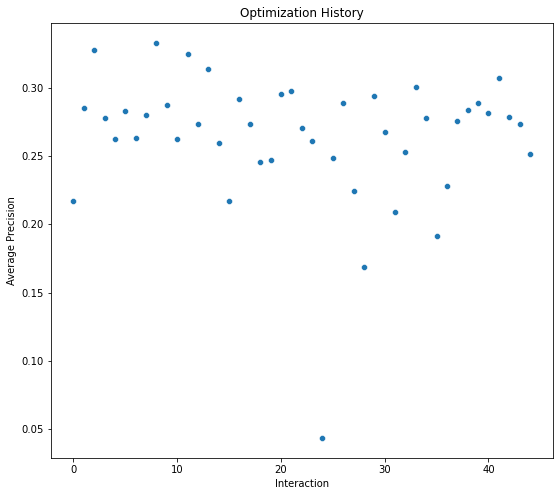

In [55]:
# Average precision over iterations

sns.scatterplot(x = xgb_history.index, y = 'average precision', data = xgb_history)
plt.title('Optimization History')
plt.xlabel(xlabel = 'Interaction')
plt.ylabel(ylabel = 'Average Precision')


In [56]:
# Obtaining the best values for further visualisation
xgb_history_best = xgb_history.sort_values(by=['average precision'], ascending = False)[:30]

Text(0, 0.5, 'Interactions')

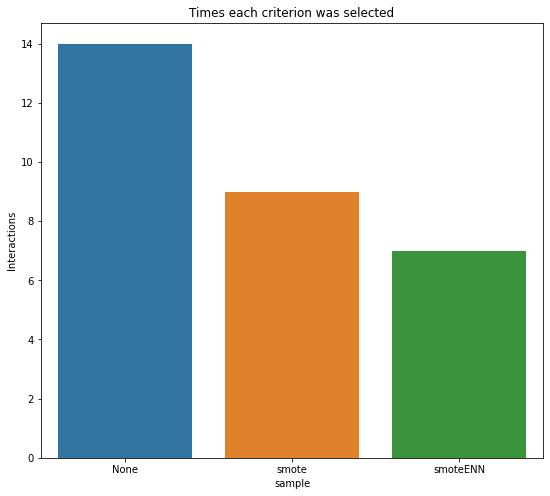

In [57]:
# Visualising sampling method

xgb_history_best['sample'] = xgb_history_best['sample'].apply(lambda x: "None" if x is np.NaN else x)
sns.countplot(x = 'sample', data = xgb_history_best)
plt.title('Times each criterion was selected')
plt.xlabel(xlabel = 'sample')
plt.ylabel(ylabel = 'Interactions')

Text(0, 0.5, 'Interactions')

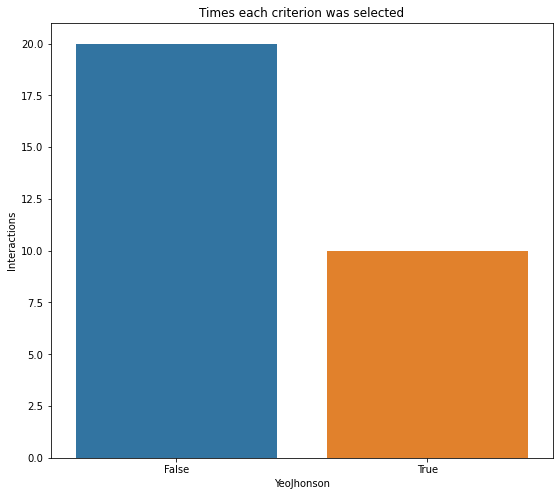

In [58]:
# Visualising the number of times standard scaler was used

sns.countplot(x = 'power', data = xgb_history_best)
plt.title('Times each criterion was selected')
plt.xlabel(xlabel = 'YeoJhonson')
plt.ylabel(ylabel = 'Interactions')

Text(0, 0.5, 'Interactions')

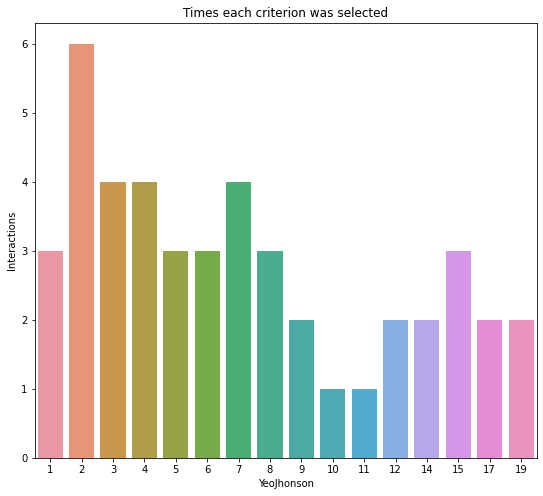

In [59]:
# Visualising the number of times each value of max depth was chosen

sns.countplot(x = 'max_depth', data = xgb_history)
plt.title('Times each criterion was selected')
plt.xlabel(xlabel = 'YeoJhonson')
plt.ylabel(ylabel = 'Interactions')

### Comparison with Baseline Method

In [60]:
X_train, X_test, y_train, y_test, eval_set = split_data(train_df_industry, labels)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)

Train: Bankruptcy = 116, No Bankruptcy = 17048
Val: Bankruptcy = 29, No Bankruptcy = 4262
Test: Bankruptcy = 36, No Bankruptcy = 5328


In [73]:
# baseline model with smoteENN

model_xgb_base = XGBClassifier(n_jobs = -1, random_state = 42,is_unbalance = True, eval_set = eval_set, early_stopping_rounds = 100,
                            verbose = 1)

smote_only = SMOTE(random_state=1, sampling_strategy=0.1)
ennObj = EditedNearestNeighbours(n_neighbors=5)
undersample = SMOTEENN(smote=smote_only , enn= ennObj)

model_xgb_baseline = Pipeline([('sample', undersample), 
                                ('xgb', model_xgb_base) ])

model_xgb_baseline_cv = cross_val_score(model_xgb_baseline, X_train, y_train, 
                                        cv = cv, 
                                        scoring = 'average_precision', 
                                        n_jobs=-1, 
                                         error_score='raise')

print("cross-validation Average Precision:",f"{model_xgb_baseline_cv.mean():.3f} STD:{model_xgb_baseline_cv.std():.2f}")

cross-validation Average Precision: 0.273 STD:0.06


In [124]:
# Comparison

classifiers = {
    "XGBBaseline": model_xgb_baseline,
    "XGBbayesOpt": xgb_initial_model
}

# df to store metrics 
results_xgb = pd.DataFrame(columns= ['metric', 'model_name', 'aucpr', 'auc', 'accuracy','F1', 'recall', 'precision', 'logloss' ])

# df to save predictions
pred_df = pd.DataFrame(y_test,index=None)

for key, classifier in classifiers.items():
    print("Running", key)
    model          = classifier.fit(X_train, y_train)
    pred_df[key]   = model.predict_proba(X_test)[:,1]
    training_score = evalue_model(model,y_test, X_test, key)
    df             = pd.DataFrame(training_score.items(), columns = ["metric", "value"])
    results_xgb   = results_xgb.append(df.set_index('metric').T)

results_xgb = results_xgb.drop('metric', axis=1).reset_index().drop('index', axis=1).sort_values("aucpr", ascending = False)
results_xgb

Running XGBBaseline
[12:57:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "eval_set", "is_unbalance", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:57:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Running XGBbayesOpt
[12:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "power", "verbose" } might not be used.


,model_name,aucpr,auc,accuracy,F1,recall,precision,logloss
1,XGBbayesOpt,0.312576,0.953873,NaN,"[0.04176334106728538, 0.04062681369704004, 0.0...",0,0,0.0236674
0,XGBBaseline,0.221836,0.952989,NaN,"[0.01633023361306419, 0.01588021778584392, 0.0...",0,0,0.0371507


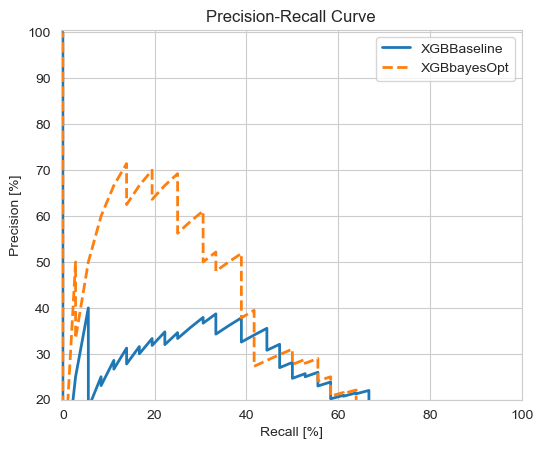

In [160]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sns.set_style("whitegrid")
plot_auc_pr("XGBBaseline", y_test, pred_df["XGBBaseline"], color=colors[0])
plot_auc_pr("XGBbayesOpt", y_test ,pred_df["XGBbayesOpt"], color=colors[1],linestyle='--')
plt.legend(loc='upper right')


From the above table and graph above, we can see that the hypertuned XGBoost model has performed way better than the simple baseline model. This is a good sign.

#### Identifying features that are more important

In [161]:
values = sorted(xgb_initial_model.steps[1][1].feature_importances_, reverse=True)
length = sum(i > 0 for i in values)
values = values[:length]
columns = train_df_industry.columns[np.argsort(xgb_initial_model.steps[1][1].feature_importances_)][::-1][:length]

Text(0.5, 0, 'Importance')

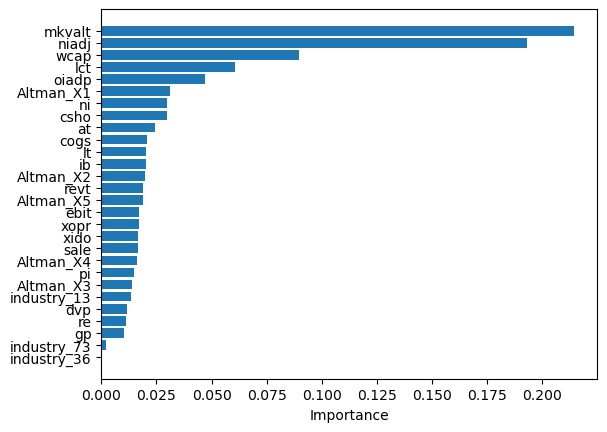

In [162]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(columns, values, align='center')
ax.set_yticks(columns)
ax.invert_yaxis() 
ax.set_xlabel('Importance')

From the first iteration of Hyperopt Tuning, we understand a few things
- Industry columns are useless (so will be dropping sic and replacing it with major division)
- Smote not too useful so replace with scale_pos
- No yeojohnosn/standardising
- Max_depth between 5 and 9
- Hyper tuning is definitely useful as it performs better than the baseline method

With this information, I proceeded to try randomised search CV with the shortlisted parameters. 

### Randomised Search with identified factors

In [170]:
X_train, X_test, y_train, y_test, eval_set = split_data(train_df_division, labels)

In [81]:
cv = RepeatedStratifiedKFold(n_splits=5, random_state=1)

params = { 'max_depth': [5, 6, 7, 8, 9],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [83]:
xgbr = XGBClassifier(seed = 20,scale_pos_weight = 0.1)
search = RandomizedSearchCV(xgbr, params, n_iter=25, scoring='f1', n_jobs=-1, cv=cv, random_state=1, verbose=3)
result = search.fit(train_df, labels)

In [117]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.14017102128950984
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.5}


In [179]:
model_xgb_random_cv = XGBClassifier(n_iter=25, scoring='f1', n_jobs=-1, cv=cv, random_state=1, 
                               seed = 20, scale_pos_weight = 0.1, verbose=3, subsample = 0.7, 
                               n_estimators = 500, max_depth = 7, learning_rate = 0.3, 
                               colsample_bytree = 0.89 , colsample_bylevel = 0.5
                              ).fit(X_train, y_train)

[13:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "cv", "n_iter", "scoring", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [180]:
pred_df  = model_xgb_random_cv.predict_proba(X_test)[:,1]
average_precision_score(y_test, pred_df)

0.19374470180855827

We can see that the randomised search cv did not perform well. Hence, I retried it with HyperOpt Tuning again.

### Hyperopt because randomised search did not signifcantly improve

#### Trial 2

In [163]:
XGB_param_hyperopt = {
    'xgb': {
        'booster': hp.choice('booster', ['dart','gbtree']),
        'learning_rate': hp.uniform('learning_rate', 0.05, 1),
        'max_depth': scope.int(hp.quniform('max_depth', 5, 9, 1)),
        'num_leaves': hp.choice(label = 'num_leaves', options = [15, 31, 63, 127, 255, 511, 1023, 2047, 4095]),
        'min_child_weight':  ho_scope.int(hp.quniform('min_child_weight',0,X_train.shape[0]/100,1)),
        'subsample': hp.uniform('subsample',0.4,1), 
        'colsample_bytree': hp.uniform('colsample_bytree',0.4,1),
        'feature_fraction': hp.uniform('feature_fraction',0.2,0.7),
        'reg_lambda': hp.loguniform('reg_lambda',np.log(1e-4),np.log(10)),
        'reg_alpha': hp.loguniform('reg_alpha',np.log(1e-4),np.log(10)),
        'min_gain_to_split': hp.loguniform('min_gain_to_split',np.log(1e-4),np.log(2)),
        'min_child_samples': ho_scope.int(hp.quniform('min_child_samples',10,500,100)),
        'scale_pos_weight' : hp.loguniform('scale_pos_weight',np.log(0.1),np.log(0.5)),
        'drop_rate': hp.uniform('drop_rate',0,1),
        'skip_drop': hp.uniform('skip_drop',0,1),
        'sample':  hp.choice(label = 'sample', options = [None]),
        'power': hp.choice(label = 'power', options = [True])
    }
}

In [134]:
history, model = run_xgb(train_df_division, labels, XGB_param_hyperopt, 100)

Train: Bankruptcy = 116, No Bankruptcy = 17048
Val: Bankruptcy = 29, No Bankruptcy = 4262
Test: Bankruptcy = 36, No Bankruptcy = 5328
100%|█████████████████████████████████████████| 100/100 [5:08:47<00:00, 185.27s/trial, best loss: -0.29406544426933495]
Historical max Average Precision: 0.333 STD:0.02


#### Trial 3

In [165]:
XGB_param_hyperopt = {
    'xgb': {
        'booster': hp.choice('booster', ['dart','gbtree']), #not trying gblinear
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
        'max_depth': scope.int(hp.quniform('max_depth', 5, 9, 1)),
        'reg_lambda':hp.choice(label = 'reg_lambda', options = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]),
        'reg_alpha':hp.choice(label = 'reg_alpha', options = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]),
        'subsample': hp.choice(label = 'subsample', options = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]), 
        'colsample_bytree': hp.uniform('colsample_bytree',0.4,1),
        'feature_fraction': hp.uniform('feature_fraction',0.2,0.7),
        'min_gain_to_split': hp.uniform('min_gain_to_split',0, 1.3),
        'scale_pos_weight' : hp.uniform('scale_pos_weight',0.1,0.5),
        'sample':  hp.choice(label = 'sample', options = [None]),
        'power': hp.choice(label = 'power', options = [True])
    }
}

In [142]:
history__revised, model_revised = run_xgb(train_df_division, labels, XGB_param_hyperopt, 150)

Train: Bankruptcy = 116, No Bankruptcy = 17048
Val: Bankruptcy = 29, No Bankruptcy = 4262
Test: Bankruptcy = 36, No Bankruptcy = 5328
100%|██████████████████████████████████████████| 150/150 [4:44:10<00:00, 113.67s/trial, best loss: -0.3236100813280905]
Historical max Average Precision: 0.333 STD:0.02


Results of the hyperparamter tuning done so far:
- xgb_history_best (no sampling + industry) -> 0.33
- randomized (scale_pos + division) -> 0.193
- history (scale_pos + division) -> 0.29
- history_revised (scale_pos + division) -> 0.323610

#### Best Model

For the best model, I decided to use the model from the very last trial. This is because the CV is close to 0.32 and it includes the scale_pos parameter. While my initial model has a performance of 0.33, I cannot proceed with it because it has no sampling strategy. 

In [61]:
# Obtaining the better parameters

history__revised.sort_values(by=['average precision'], ascending = False)[:30]

,Unnamed: 0,booster,colsample_bytree,feature_fraction,learning_rate,max_depth,min_gain_to_split,power,reg_alpha,reg_lambda,sample,scale_pos_weight,subsample,average precision
69,69,gbtree,0.700502,0.629093,0.062863,6,0.540027,True,0.03,3.5,NaN,0.389145,0.6,0.323610
24,24,gbtree,0.670093,0.610021,0.097823,8,0.338863,True,0.03,3.0,NaN,0.181290,0.8,0.322092
36,36,gbtree,0.789424,0.350189,0.133642,7,0.875222,True,0.02,4.5,NaN,0.228075,0.6,0.320285
147,147,gbtree,0.821080,0.627129,0.070996,5,0.365165,True,0.03,3.5,NaN,0.412244,0.6,0.320080
61,61,gbtree,0.760549,0.611397,0.062960,6,0.446646,True,0.03,3.5,NaN,0.390034,0.6,0.320021
125,125,gbtree,0.639907,0.479121,0.069995,9,0.470467,True,0.03,2.0,NaN,0.232042,0.6,0.319491
54,54,gbtree,0.531546,0.409507,0.085228,7,0.359826,True,0.02,1.0,NaN,0.155661,0.6,0.319435
131,131,gbtree,0.931930,0.560922,0.128418,7,0.963911,True,0.04,4.0,NaN,0.201741,0.4,0.319371
103,103,dart,0.730424,0.277866,0.115573,5,0.507182,True,0.06,4.0,NaN,0.196323,0.6,0.319367
148,148,gbtree,0.825863,0.554913,0.073645,5,0.357642,True,0.03,3.5,NaN,0.374863,0.6,0.319099


In [62]:
best_params = history__revised.sort_values(by=['average precision'], ascending = False)[:1].drop(columns = ['Unnamed: 0', 'average precision']).to_dict('records')[0]

In [63]:
# building a model with the identified best parameters
# answered all parts? random seed - save all files finally

model_best = XGBClassifier(**best_params, 
                n_jobs = -1,
                random_state = 42,
                early_stopping_rounds = 100,
                verbose = 0,
                silent = True
                 )  
power = PowerTransformer(method='yeo-johnson', standardize=True)
model_best = Pipeline([('power', power), ('xgb', model_best) ])      

In [64]:
# obtaining cross-validated probability for q5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)

y_pred_proba = cross_val_predict(model_best, train_df_division, labels, cv=cv, method = 'predict_proba' )
average_precision_score(labels, pd.DataFrame(y_pred_proba)[1].values)

[11:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "feature_fraction", "min_gain_to_split", "power", "sample", "silent", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "feature_fraction", "min_gain_to_split

0.2795220785500862

Fitting best model and predicting on test data

In [65]:
model_best.fit(train_df_division, labels)
predicted_proba = model_best.predict_proba(test_df_division)

[11:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "feature_fraction", "min_gain_to_split", "power", "sample", "silent", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Saving important files

In [66]:
pd.DataFrame(predicted_proba)[1].to_csv('submission_A0192263E.csv')

In [67]:
df_train['cv_probability'] = pd.DataFrame(y_pred_proba)[1].values

In [68]:
df_train.to_csv('final_train_table.csv')

In [69]:
import pickle
filename = 'A0192263E_model.sav'
pickle.dump(model_best, open(filename, 'wb'))

### Q5

Preparing the table for understanding relationship between general category and altman z_score, component variables and cv probas

In [70]:
q5_df = pd.read_excel('C:/Y4S1/BT4016/Assignment/train.xlsx', 'Q5')
q5_df = q5_df.drop_duplicates()
q5_df = q5_df.fillna('Others')

In [71]:
# General Rating Column

q5_df['General_Rating'] = None

q5_df['General_Rating'] = np.where(q5_df['Rating'].str.contains('SD'), 'SD', q5_df['General_Rating'])

q5_df['General_Rating'] = np.where(q5_df['Rating'].str.contains('A'), 'A', q5_df['General_Rating'])

q5_df['General_Rating'] = np.where(q5_df['Rating'].str.contains('BBB'), 'BBB', q5_df['General_Rating'])
q5_df['General_Rating'] = np.where(q5_df['Rating'].isin(['BB', 'BB+', 'BB-']), 'BB', q5_df['General_Rating'])
q5_df['General_Rating'] = np.where(q5_df['Rating'].isin(['B', 'B+', 'B-']), 'B', q5_df['General_Rating'])

q5_df['General_Rating'] = np.where(q5_df['Rating'].str.contains('C'), 'C', q5_df['General_Rating'])

q5_df['General_Rating'] = np.where(q5_df['Rating'].str.contains('Others'), 'Others', q5_df['General_Rating'])

In [72]:
# Getting rows only from 2011

df_train_11 = df_train[pd.DatetimeIndex(df_train.datadate).year==2011]
df_train_11 = df_train_11.drop_duplicates()

In [73]:
essential_columns = ['Altman_X1', 'Altman_X2',	'Altman_X3', 'Altman_X4', 'Altman_X5', 'conm', 'Z_score', 'cv_probability','General_Rating']

In [74]:
final_df = df_train_11.merge(q5_df, how='left', left_on=['gvkey'], right_on=['GVKey'])[essential_columns].drop_duplicates()
final_df = final_df.drop(columns = 'conm')

In [75]:
# final table with all the information

final_df

,Altman_X1,Altman_X2,Altman_X3,Altman_X4,Altman_X5,Z_score,cv_probability,General_Rating
0,0.269566,0.787958,0.054974,1.337426,0.802918,3.213409,0.001626,Others
1,0.302949,0.122722,0.101234,7.837019,0.700172,6.271806,0.001567,Others
2,0.258158,0.244216,0.070187,0.759905,2.181182,3.520435,0.001804,Others
3,-0.132921,0.193790,0.162170,1.074658,2.830563,4.122319,0.001778,Others
4,0.376202,0.650973,0.135470,4.668577,1.141097,5.752100,0.001567,Others
...,...,...,...,...,...,...,...,...
2570,0.536611,0.090148,0.133980,5.288801,0.804386,5.189941,0.001551,Others
2571,0.103112,-0.191081,0.079716,1.657171,0.328249,1.441835,0.001548,B
2572,0.280967,0.018127,0.184421,1.517213,2.234555,4.116011,0.001581,BB
2573,0.013940,-0.078596,0.036182,0.532568,0.116311,0.461944,0.001665,Others


In [76]:
final_df['General_Rating'] = pd.Categorical(final_df['General_Rating'] , ['SD', 'A', 'BBB', 'BB', 'B', 'C', 'Others'])

In [77]:
median_table = final_df.groupby(final_df.General_Rating).median()

In [78]:
# Combined table 
display(median_table)

,Altman_X1,Altman_X2,Altman_X3,Altman_X4,Altman_X5,Z_score,cv_probability
General_Rating,,,,,,,
SD,0.063379,-0.535731,0.031620,0.023996,1.603860,0.637967,0.108207
A,0.061881,0.279661,0.096254,1.557993,0.650599,3.025436,0.001581
BBB,0.068372,0.194337,0.088786,1.295671,0.603134,2.199439,0.001702
BB,0.134011,0.073551,0.079793,1.078747,0.800580,2.186057,0.001606
B,0.091760,-0.103274,0.067434,0.484684,0.809892,1.311357,0.002376
C,0.113906,-0.566092,-0.046038,0.112871,0.385995,-0.706604,0.032365
Others,0.220062,0.152482,0.079225,1.970494,0.821419,3.125429,0.001626


#### Visualisations of the above values

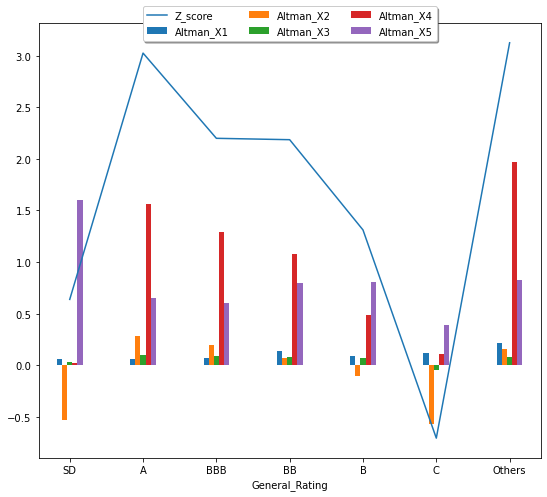

In [79]:
# Altman components + z_score vs the General rating category

width = 0.35

median_table[['Altman_X1', 'Altman_X2',	'Altman_X3', 'Altman_X4', 'Altman_X5']].plot(kind='bar', width = width)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
median_table['Z_score'].plot()

ax = plt.gca()

ax.set_xticklabels(list(median_table.index))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.show()

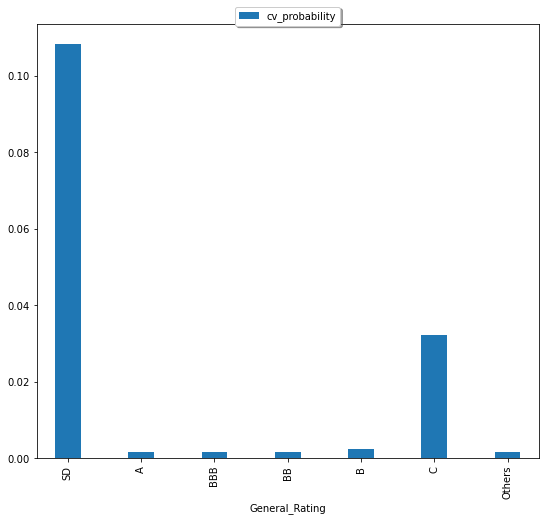

In [80]:
# cv probability of bankruptcy

width = 0.35
median_table[['cv_probability']].plot(kind='bar', width = width)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

ax = plt.gca()

ax.set_xticklabels(list(median_table.index))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.show()



It is interesting to note that the values go hand-in-hand with our beliefs. The Z_score and its respective components decrease the categories span from A -> B -> C. The 3 companies under SD can be kept somewhat as a benchmark. In that way, the C rated companies perform worse than the SD companies. This is the same for cv probability of bankruptcy. However, SD companies have the highest probability of bankruptcy among all categories. This could also be due to the fact that there are only 3 companies in the SD category and hence it might not be an accurate representation.

As for all the 'Others', their median z-score/component variables values are considerably high while their cv probability is low.

#### Others

In [81]:
#xgb_history.to_csv('initial_history.csv')
# history.to_csv('history.csv')
# history__revised.to_csv('history_revised.csv')

In [82]:
# xgb_history = pd.read_csv('C:/Y4S1/BT4016/Assignment/initial_history.csv')
# history = pd.read_csv('C:/Y4S1/BT4016/Assignment/history.csv')
# history__revised = pd.read_csv('C:/Y4S1/BT4016/Assignment/history_revised.csv')